<span style="font-size:200%">**프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를    맞춰보자!** </span>



In [1]:
#필요한 라이브러리 호출
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
diabetes = load_diabetes()
df = diabetes
df_X = df.data
df_y = df.target

In [3]:
#data keys 조회
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
#Pandas를 통하여 data 확인
df = pd.DataFrame(df_X, columns=df.feature_names)
df["target"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
#numpy array로 변환
df_X = np.array(df_X)
df_y = np.array(df_y)

In [6]:
#해당 dataframe을 numpy array로 변환된 것을 확인
print(type(df_X))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
#데이터셋 확인
print(df_X.shape)

(442, 10)


In [8]:
print(df_y.shape)

(442,)


In [9]:
print('<x_data[0]>:', df_X[0])

<x_data[0]>: [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


In [10]:
#train, test split 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [11]:
#잘 분리되었는가 확인
print('X_train의 갯수:', len(X_train), 'X_test의 갯수:', len(X_test))

X_train의 갯수: 353 X_test의 갯수: 89


In [12]:
print('y_train의 갯수:', len(y_train), 'y_test의 갯수:', len(y_test))

y_train의 갯수: 353 y_test의 갯수: 89


In [13]:
#w,b 초기값 지정
W = np.random.rand(10)
b = np.random.rand()

In [14]:
#모델 정의
def model(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

In [15]:
#손실함수를 MSE로 정의
def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

In [16]:
#손실함수 loss 정의
def loss(X,W,b,y):
    prediction = model(X, W, b)
    L = MSE(y, prediction)
    return L

In [17]:
#gradient 함수 구현

def gradient(X,W,b,y):
    N = len(X)
    y_pred = model(X,W,b)
    dW = 1/N*2*X.T.dot(y_pred-y)
    db = 2*(y_pred-y).mean()
    return dW, db

In [18]:
#하이퍼 파라미터인 학습률 설정
LEARNING_RATE = 0.9

In [19]:
#정의된 손실함수와 기울기를 통하여 모델을 학습, Iteration을 5000, learning_rate을 0.9로 두고 진행

losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X, W, b, df_y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3486.0342
Iteration 200 : Loss 3100.1355
Iteration 300 : Loss 2978.2559
Iteration 400 : Loss 2931.9474
Iteration 500 : Loss 2913.8645
Iteration 600 : Loss 2906.7869
Iteration 700 : Loss 2904.0034
Iteration 800 : Loss 2902.8756
Iteration 900 : Loss 2902.3710
Iteration 1000 : Loss 2902.0917
Iteration 1100 : Loss 2901.8881
Iteration 1200 : Loss 2901.7072
Iteration 1300 : Loss 2901.5314
Iteration 1400 : Loss 2901.3563
Iteration 1500 : Loss 2901.1815
Iteration 1600 : Loss 2901.0074
Iteration 1700 : Loss 2900.8347
Iteration 1800 : Loss 2900.6636
Iteration 1900 : Loss 2900.4945
Iteration 2000 : Loss 2900.3272
Iteration 2100 : Loss 2900.1618
Iteration 2200 : Loss 2899.9983
Iteration 2300 : Loss 2899.8365
Iteration 2400 : Loss 2899.6764
Iteration 2500 : Loss 2899.5179
Iteration 2600 : Loss 2899.3609
Iteration 2700 : Loss 2899.2053
Iteration 2800 : Loss 2899.0511
Iteration 2900 : Loss 2898.8983
Iteration 3000 : Loss 2898.7467
Iteration 3100 : Loss 2898.5964
Iteration 3200 : 

**df_x_without_bmi = np.delete(df_x, 2, axis=1), df_x_without_s3 = np.delete(df_x,6, axis=1)와 같은 방식을 통해 bmi x칼럼을 제외를 시도해보기도 하고, s2와 s3의 차이가 liproproteins의 density가 low냐 high냐에 따라 구분되는 feature인 것을 확인한 후에 서로 겹치는 특성인 것으로 파악하여 s3을 제외하여 모델을 재구성해보기도 하였으나, 해당 Loss값 이하로 내려가지는 않았음. 따라서 원래 데이터의 칼럼정보를 보존하는 방식으로 학습진행하기로 결정!**

**또한 learning_rate의 경우 통상적으로 0.1~0.001을 사용하는 것으로 알고있으나, 해당 모델에서는 0.9로 설정하였을때 가장 성능이 준수한 것을 확인**

In [20]:
prediction = model(X_test, W, b)

In [21]:
#MSE 측정
MSE(y_test, prediction)

2902.3190694616787

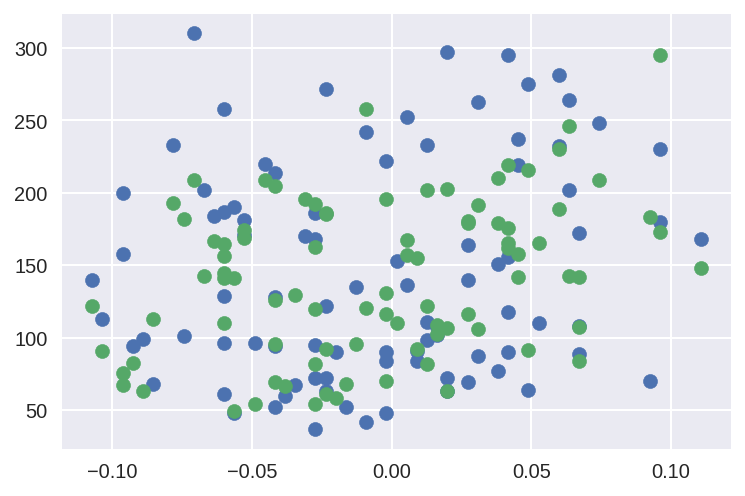

In [22]:
# 실제 데이터와 예측값 시각화

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

<span style="font-size:180%">**프로젝트2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?** </span>


In [23]:
#필요한 라이브러리 호출

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sklearn
import warnings
warnings.filterwarnings(action='ignore')

In [24]:
import seaborn as sns

In [25]:
train_df = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [26]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
#datetime을 활용하여 datetime을 year, month, day, hour, minute, second로 분리
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second

In [28]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [30]:
#데이터 결측치 확인

train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

<AxesSubplot:>

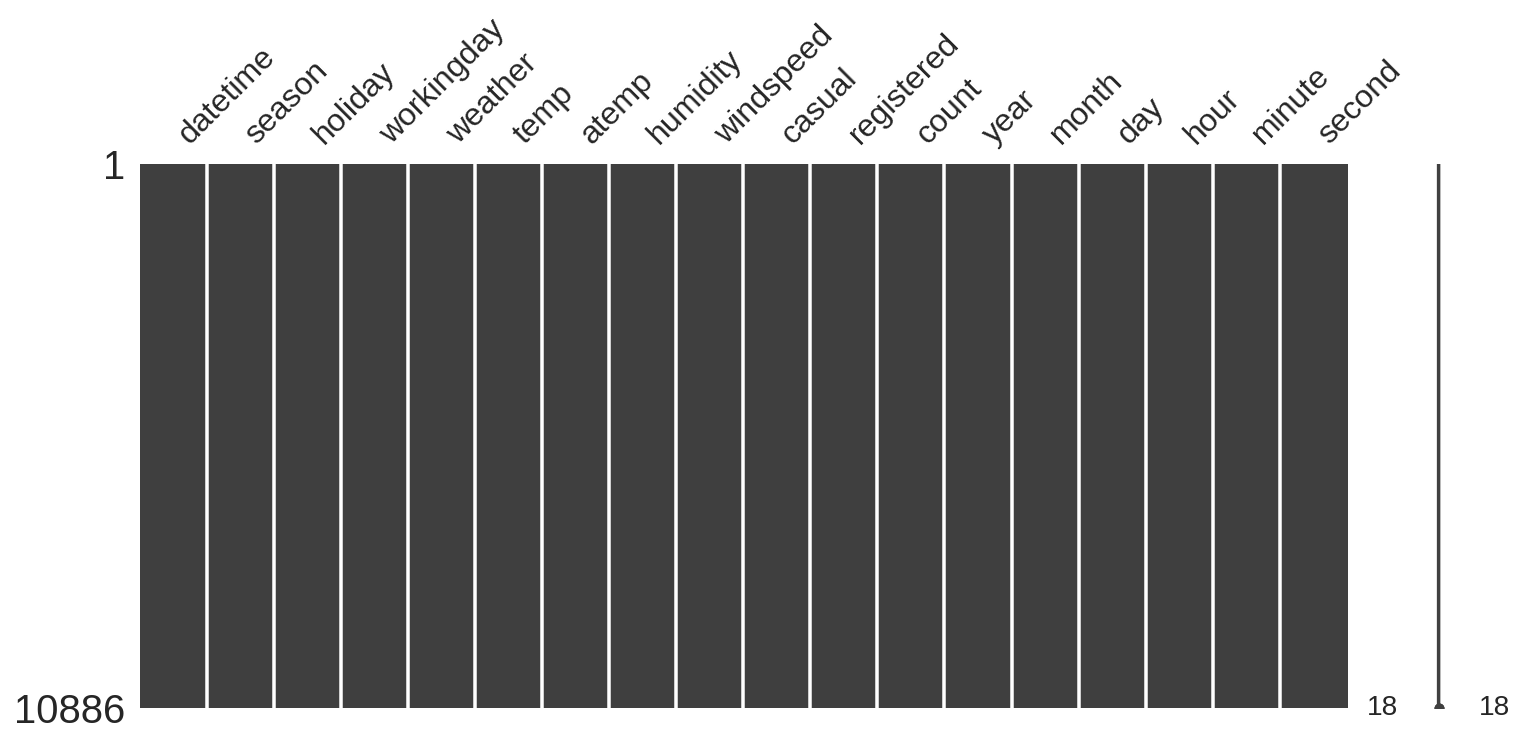

In [31]:
import missingno as msno
msno.matrix(train_df, figsize=(12,5))

#시각화를 통해 Missing data가 없음을 확인

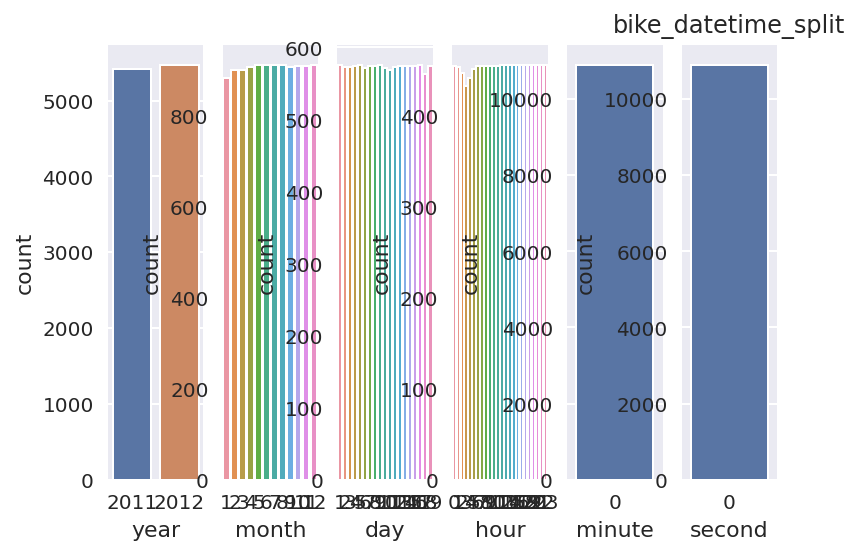

In [32]:
#Year, month, day, hour, minute, second에 대해 시각화
fig,ax = plt.subplots(ncols=6)
sns.set(rc = {'figure.figsize':(55,6)})
sns.countplot(train_df['year'], ax=ax[0])
sns.countplot(train_df['month'], ax=ax[1])
sns.countplot(train_df['day'], ax=ax[2])
sns.countplot(train_df['hour'], ax=ax[3])
sns.countplot(train_df['minute'], ax=ax[4])
sns.countplot(train_df['second'], ax=ax[5])
plt.title('bike_datetime_split')
plt.show()

<AxesSubplot:xlabel='workingday', ylabel='count'>

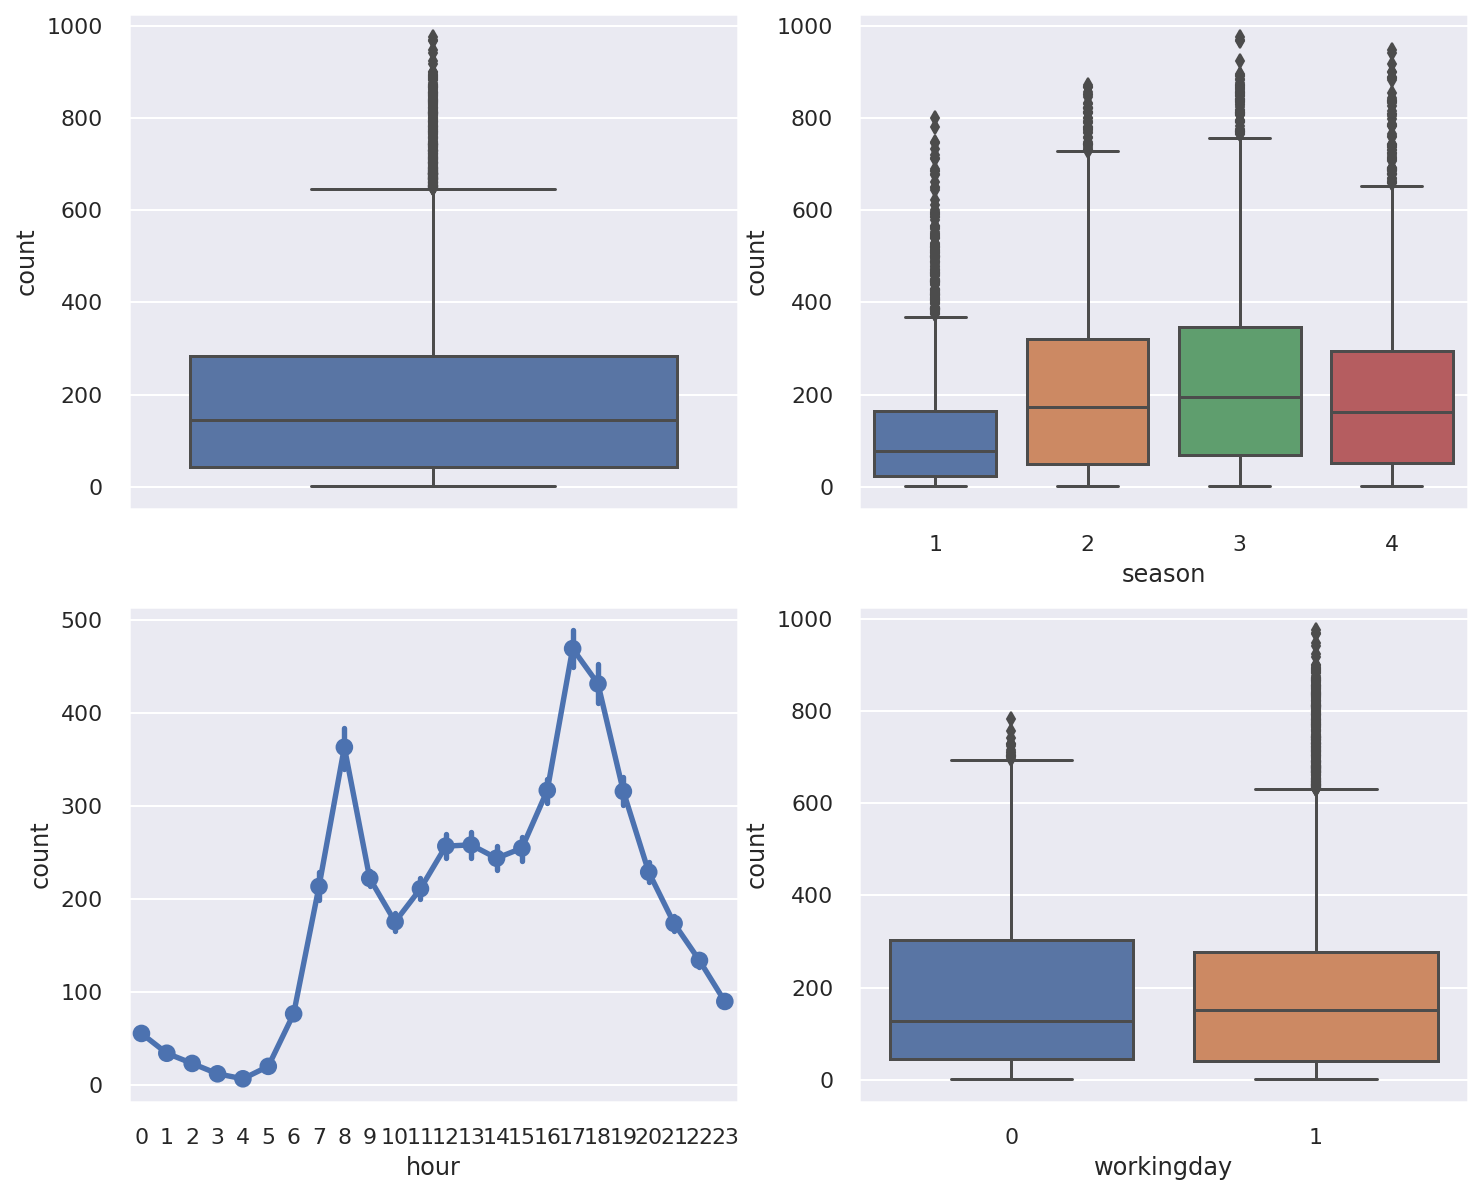

In [33]:
#count에 대한 season, hour, workingday 시각화
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train_df, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=train_df, y="count", x="season", orient="v", ax=axes[0][1])
sns.pointplot(data=train_df, y="count", x="hour", orient="v",ax=axes[1][0])
sns.boxplot(data=train_df, y="count", x="workingday", orient="v",ax=axes[1][1])

**데이터 전처리 -> 학습에 불필요한 칼럼제거**

In [34]:
#casual + registered = count이므로 두개의 변수는 이제 상관 없음 , datetime역시 새로운 칼럼으로 만들어주었으므로 필요없음.
train_df = train_df.drop(['datetime', 'casual', 'registered'], axis=1)

In [35]:
#또한 minute과 second 역시 전부 0이므로 유의미한 feature라고 할 수 없으므로 칼럼에서 drop시킴

train_df = train_df.drop(['minute', 'second'], axis=1)

In [36]:
#day 역시 train.csv에서 19일까지 밖에 나타나지 않기때문에 모델학습에서 제외시켜야 함.
train_df = train_df.drop(['day'], axis=1)

In [37]:
#칼럼 제외되었는지 확인환
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4


<AxesSubplot:xlabel='windspeed', ylabel='count'>

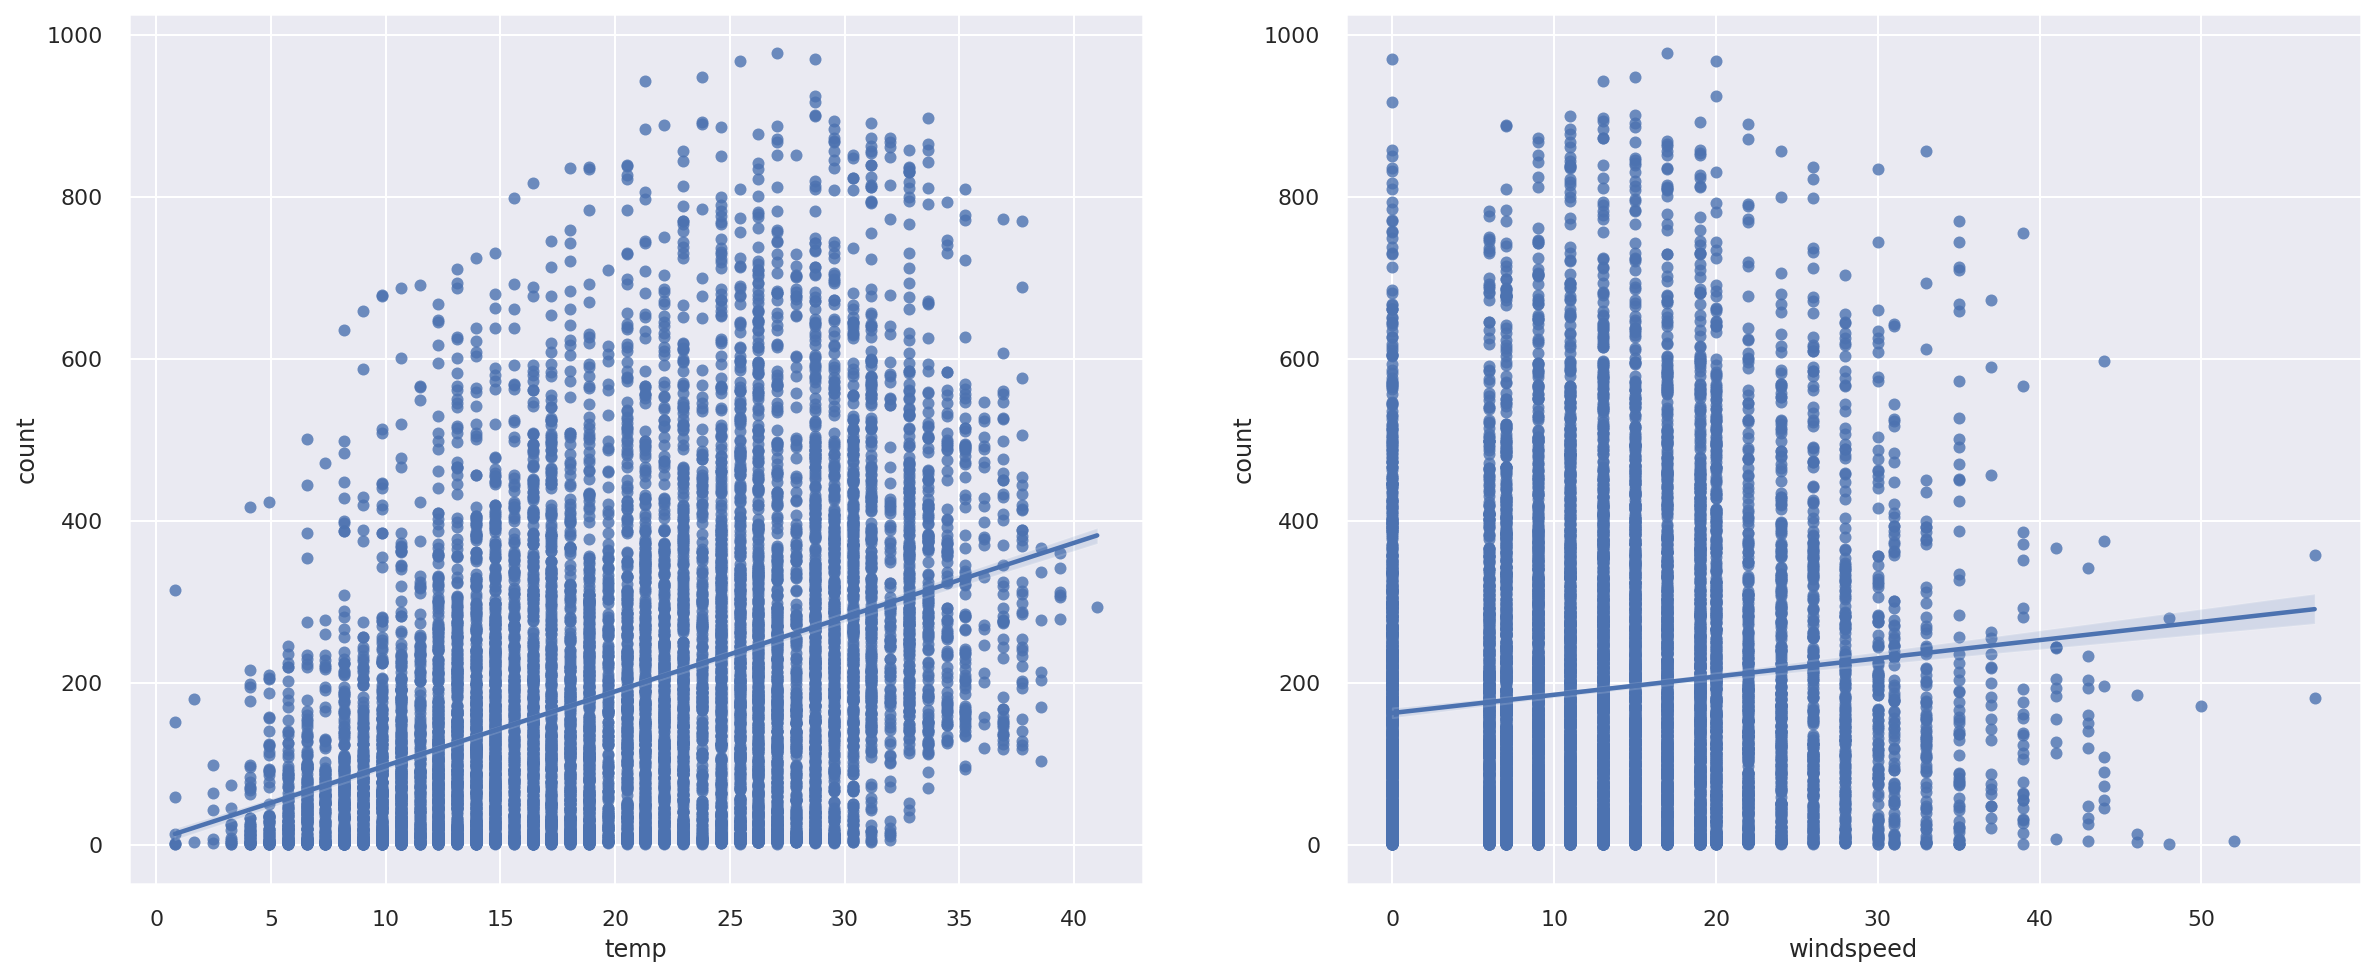

In [38]:
#windspeed, temp가 자전거 대여에 상관관계가 높을 것이라 예측하여 시각화, 바람이 많이 불수록 사람들은 자전거를 '덜' 빌리고, 
#온도가 적당히 따뜻할때(15~30)에 count가 몰려있는 것을 확인 가능

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 8)
sns.regplot(x="temp", y="count", data=train_df, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train_df, ax=ax2)

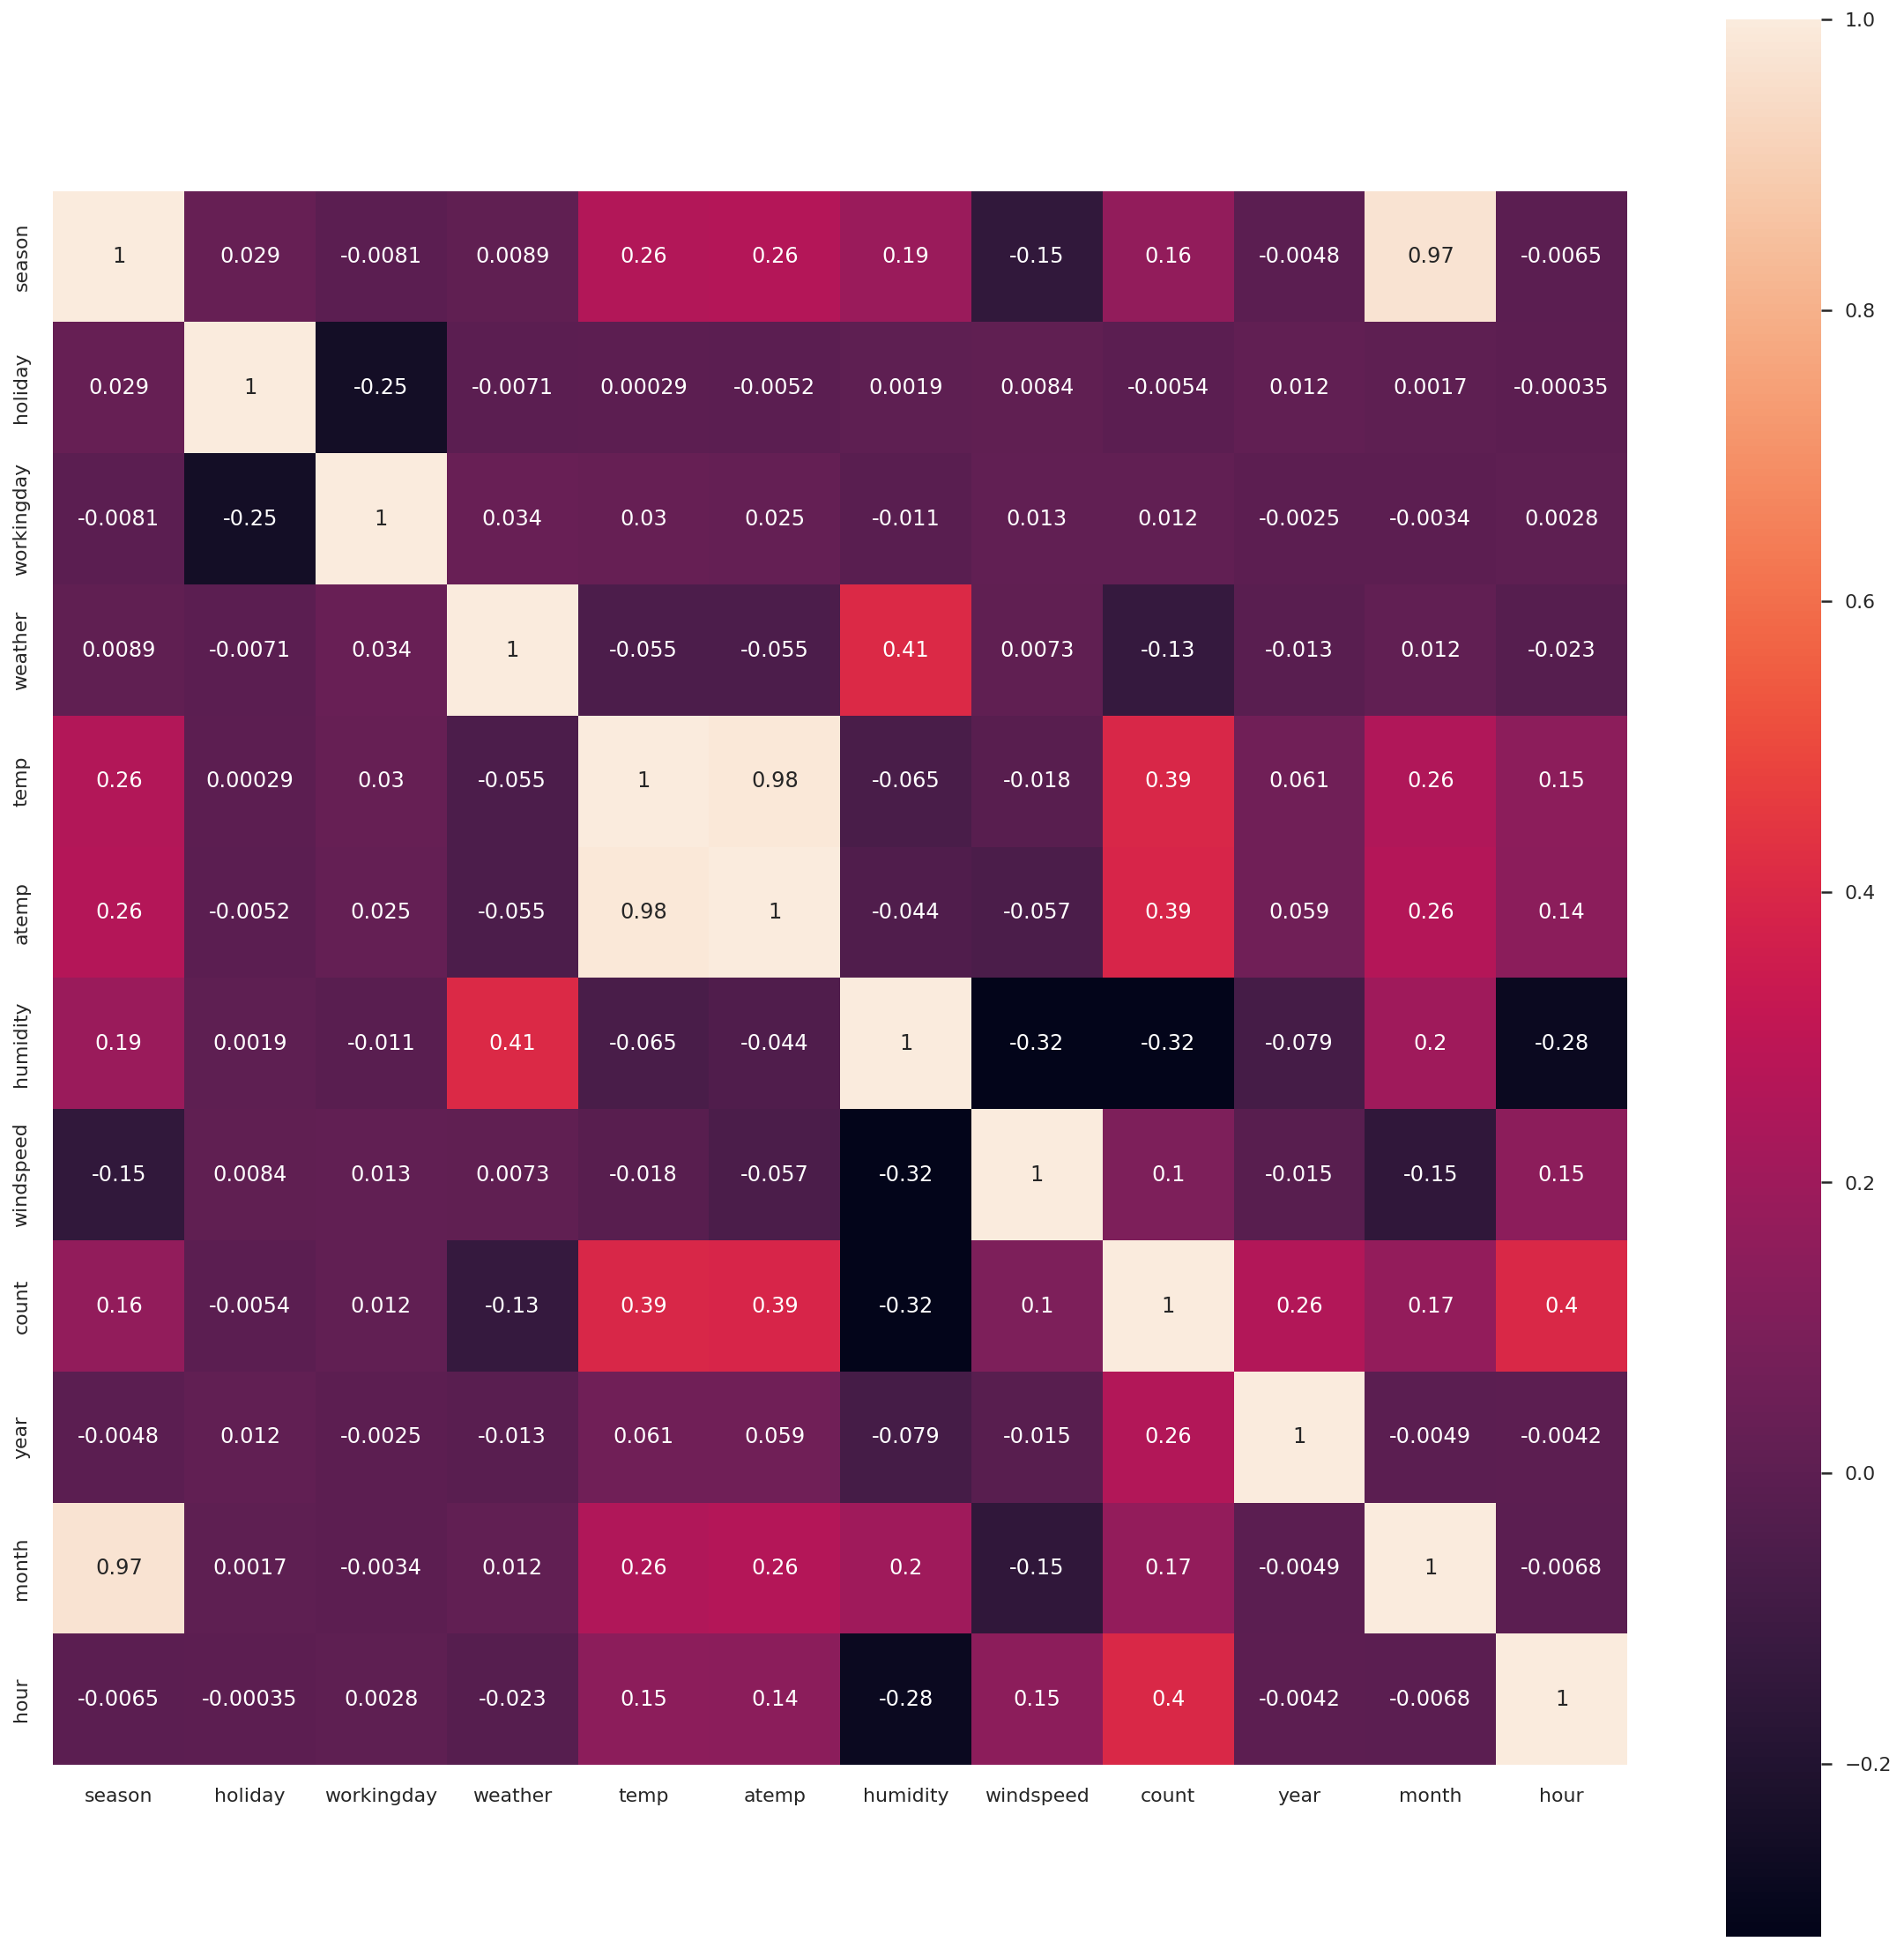

In [39]:
#heatmap을 통한 상관계수파악 시각화 

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train_df.corr(),annot=True,square=True)


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
#Train, test set split
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['count'], axis=1), train_df['count'], test_size=0.2, random_state=17)

In [42]:
#model 선언 및 학습
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [43]:
predictions = linear_reg.predict(X_test)

In [44]:
#모델 평가를 위해 MSE, RMSE 값 구하기
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)**0.5

In [45]:
#RMSE가 약 142로 측정된 것을 확인
print(mse)
print(rmse)

20408.199900647298
142.85727108077944


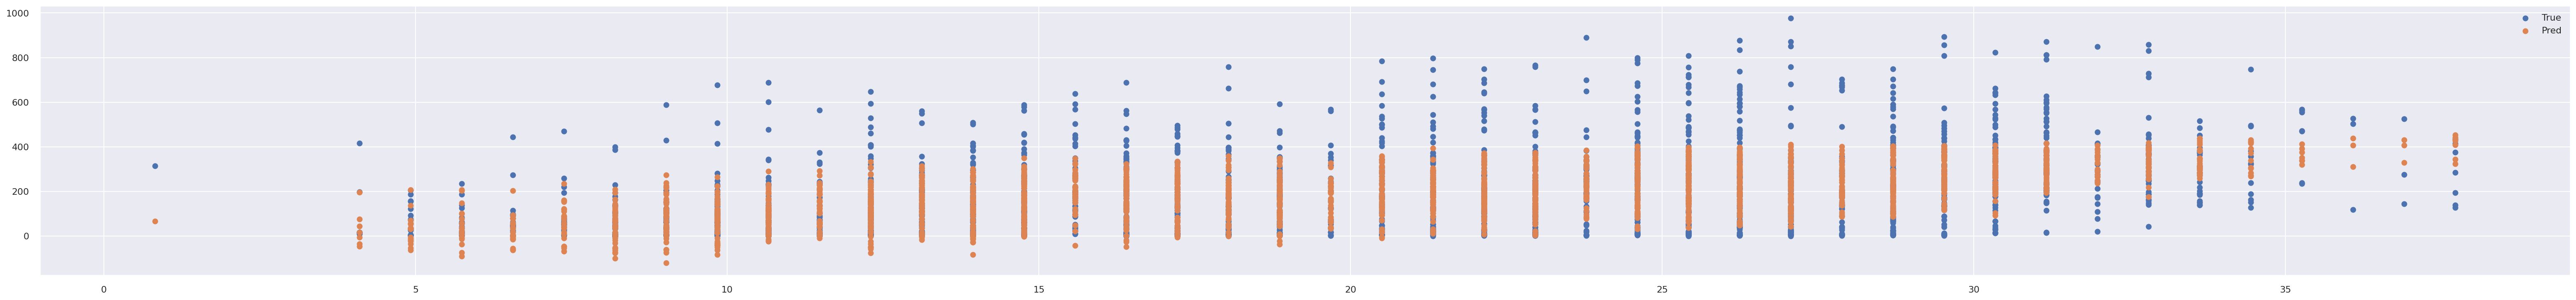

In [46]:
#x축에 temp를, y축에 count로 예측결과 시각화 하기
plt.scatter(X_test["temp"], y_test, label="True")
plt.scatter(X_test["temp"], predictions, label="Pred")
plt.legend()
plt.show()

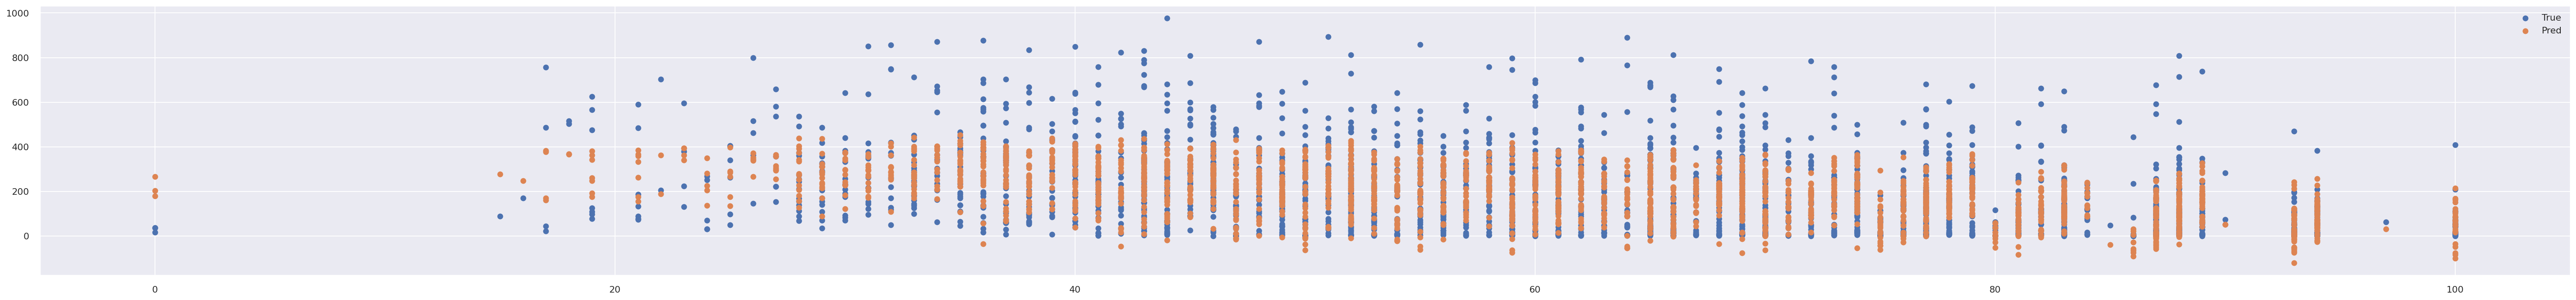

In [47]:
#x축에 humidity를, y축에 count로 예측결과 시각화 하기
plt.scatter(X_test["humidity"], y_test, label="True")
plt.scatter(X_test["humidity"], predictions, label="Pred")
plt.legend()
plt.show()


<span style="font-size:250%">**회고!** </span>

 
 결국 중요한 것은 어떠한 선택을 내리는 작업들이다. 이전의 EXP에서는 어떠한 모델을 선택할 것인가를 고민하였다면, 이번 익스에서는 그 고민의 범주가 조금 더 복잡하다. 이번 EXP에서 출제자가 요구하는 고민은 "모델을 학습시키는데 있어 어떠한 전처리 과정을 수행할 것인가?"에 관해 생각해보라는 것이다. 이러한 작업 해당 학습 모델을 구성하는데 있어 가장 중요한 작업이 된다고 할 수 있다. 
 
 당뇨병 문제에서 어떠한 칼럼들을 제거할 것인가? 당뇨병에 대한 도메인 지식이 없다면 lirproteins의 density의 정도가 실제 당뇨병의 측정에 얼마나 유의미한 변수로 작용하는지에 관해 알 수 없지만, 상관관계를 통해 해당 변수들에 대해 이해과정을 거친 후 부분적으로 활용해볼 수 있다. Bike sharing demand 문제 역시 실제 데이터에서 windspeed와 같은 변수들이 자전거 대여에 유의미한 변수로 작용할 것이라 생각하였지만 실제 windspeed 데이터는 상당부분 0에 몰려있어 주요한 변수로 작용해줄 수 없음을 알 수 있었다. 결국 해당 칼럼에 관한 데이터가 온전한가? 그 데이터는 해당 모델 학습에 유의미한 변수로 작용할 수 있는가를 판별하는 것이 중요하다고 할 수 있다. 

 전처리 과정에서 위와 같은 고민들을 거치게 된다면, 이후 diabetes 문제에도 보듯 Iteration, learning_rate를 얼마나 줄것인가를 설정하는 문제 역시 중요하다. 즉 어떻게 '하이퍼파라미터를 튜닝할 것인가?'의 문제이다. 처음 시도에는 일반적으로 learning-rate가 0.1~0.001 사이의 수준이면 해당 모델이 잘 학습될 것이라 판단하여 이 사이에서만 모델을 돌려보았지만, 유의미하게 해당 Loss 지표가 개선되지는 않았다. 오히려 learning_rate를 0.9정도 주었을때, mse가 가장 적절한 수준을 찾아갈 수 있게 되었다. iteration 역시 다양한 방식으로 설정해보았으나, 성능 상의 큰 변화를 주지는 못했다. 사실 적절한 lr과 epoch을 설정하는 문제는 여전히 '감'이나 '실험'에 의존해서 판단할 수 밖에 없는듯하다(라고 어제 적었는데 수정하자면,, 오늘 kaggle house price를 보다보니.. 하이퍼 파라미터를 튜닝하는 방식이 있더라..! Grid search를 통해서 적절한 하이퍼파라미터 튜닝하는 방식에 관해서 좀더 배운 후 bike sharing demand나 diabetes문제를 다시 풀어볼 필요가 있을 것 같다).
 
끝으로 시각화에 관한 이야기를 안할 수 없다. 어떠한 칼럼을 제외할 것이냐? 어떠한 하이퍼파라미터를 설정할 것이냐? 어떠한 모델을 통해 해당 데이터를 학습시킬 것이냐?는 고민보다 어떤 그래프를 그릴 것이냐?는 상대적으로 좀 더 '재밌는' 고민이다. Data visualization을 잘한 캐글들 보면서 공부해볼 수 있겠다..!
